https://www.kaggle.com/datasets/gregorut/videogamesales



In [602]:
# importing all needed libraries
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns


# Problem Statement

In the competitive video game industry, understanding the key determinants of game sales is crucial for developers, publishers, and marketers. The dataset from vgsales.csv, which contains historical sales data for video games across various platforms, provides an opportunity to explore these factors. The dataset includes attributes such as game title, platform, year of release, genre, publisher, global sales figures, and regional sales data(North America, Europe, etc.).

#Target variable

* Target variable is global sales

# About Dataset

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.


#features

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.

It is based on BeautifulSoup using Python.

There are 16,598 records. 2 records were dropped due to incomplete information.

# 1) Understand the data

In [603]:
# Load csv dataset
df=pd.read_csv('/content/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [604]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [605]:
# show first 15 rows of the dataset
df.head(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [606]:
# show last 15 rows of the dataset
df.tail(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16583,16586,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.0,0.01
16584,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.0,0.01
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.0,0.01
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00,0.01,0.00,0.0,0.01
16587,16590,Mezase!! Tsuri Master DS,DS,2009.0,Sports,Hudson Soft,0.00,0.00,0.01,0.0,0.01
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01


In [607]:
# check shape of the dataset
df.shape

(16598, 11)

In [608]:
# show random 20 rows of the dataset
df.sample(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3684,3686,Top Gun: Fire at Will!,PS,1996.0,Misc,Microprose,0.30,0.21,0.00,0.04,0.55
4910,4912,LocoRoco,PSP,2006.0,Platform,Sony Computer Entertainment,0.14,0.05,0.16,0.04,0.39
12995,12997,Ultra Bust-A-Move,XB,2004.0,Puzzle,505 Games,0.04,0.01,0.00,0.00,0.05
3104,3106,Yoshi Topsy-Turvy,GBA,2004.0,Platform,Nintendo,0.25,0.09,0.30,0.01,0.65
7977,7979,Magical Starsign (US sales),DS,2006.0,Role-Playing,Nintendo,0.16,0.03,0.00,0.00,0.19
3123,3125,MX vs. ATV Untamed,PSP,2007.0,Racing,THQ,0.35,0.18,0.00,0.12,0.65
3109,3111,World of Dragon Warrior - Torneko: The Last Hope,PS,1999.0,Role-Playing,Enix Corporation,0.02,0.01,0.58,0.04,0.65
15718,15721,Marvel Superheroes 3D: Grandmaster's Challenge,Wii,2010.0,Action,Neko Entertainment,0.00,0.01,0.00,0.00,0.02
15951,15954,Choro Q,PS2,2003.0,Racing,Zoo Digital Publishing,0.01,0.01,0.00,0.00,0.02
2198,2200,The SpongeBob SquarePants Movie,GC,2004.0,Platform,THQ,0.73,0.19,0.00,0.03,0.94


In [609]:
# how many columns in the dataset
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# 2) Data cleaning

In [610]:
# identifing null values
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [611]:
# fill null values using median
df['Year']=df['Year'].fillna(df['Year'].median())

# fill null values using mode
df['Publisher']=df['Publisher'].fillna(df['Publisher'].mode()[0])


In [612]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [613]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# 3) Descriptive statistics

In [615]:
# Summary statistics for numerical columns
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.416134,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781686,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [616]:
# summary statistics for non-numerical columns
df.describe(include=object)

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16598
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1409


# 4) Data visualization

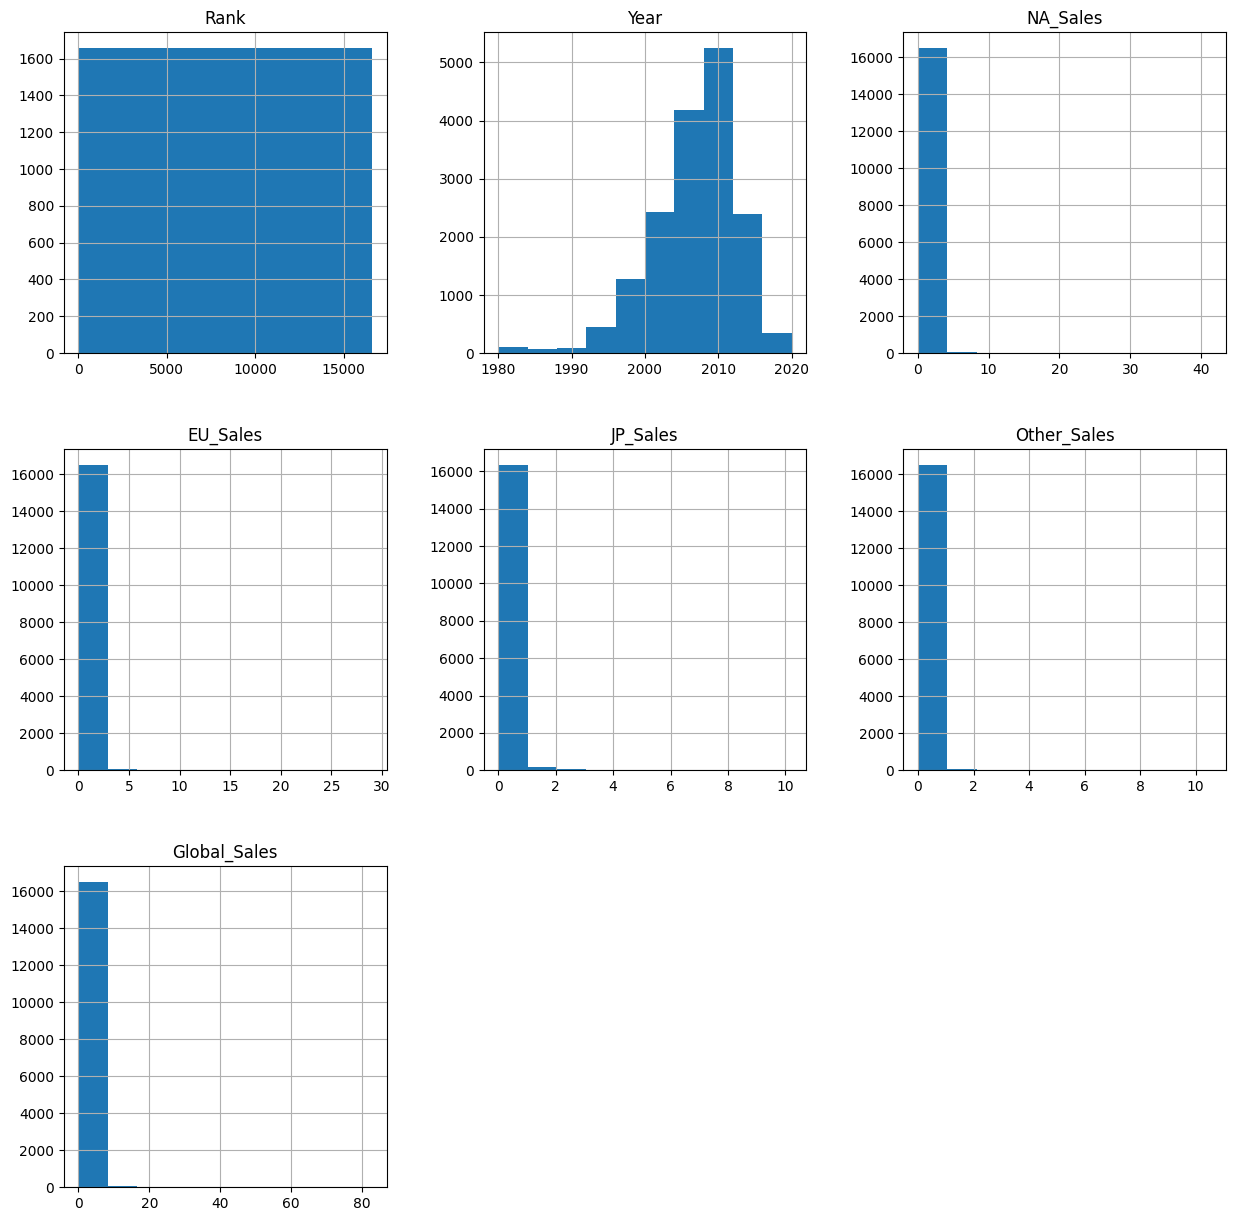

In [617]:
# visualization skewness
df.hist(figsize=(15,15))
plt.show()

,0
Rank,"Axes(0.125,0.747241;0.227941x0.132759)"
Year,"Axes(0.398529,0.747241;0.227941x0.132759)"
NA_Sales,"Axes(0.672059,0.747241;0.227941x0.132759)"
EU_Sales,"Axes(0.125,0.587931;0.227941x0.132759)"
JP_Sales,"Axes(0.398529,0.587931;0.227941x0.132759)"
Other_Sales,"Axes(0.672059,0.587931;0.227941x0.132759)"
Global_Sales,"Axes(0.125,0.428621;0.227941x0.132759)"


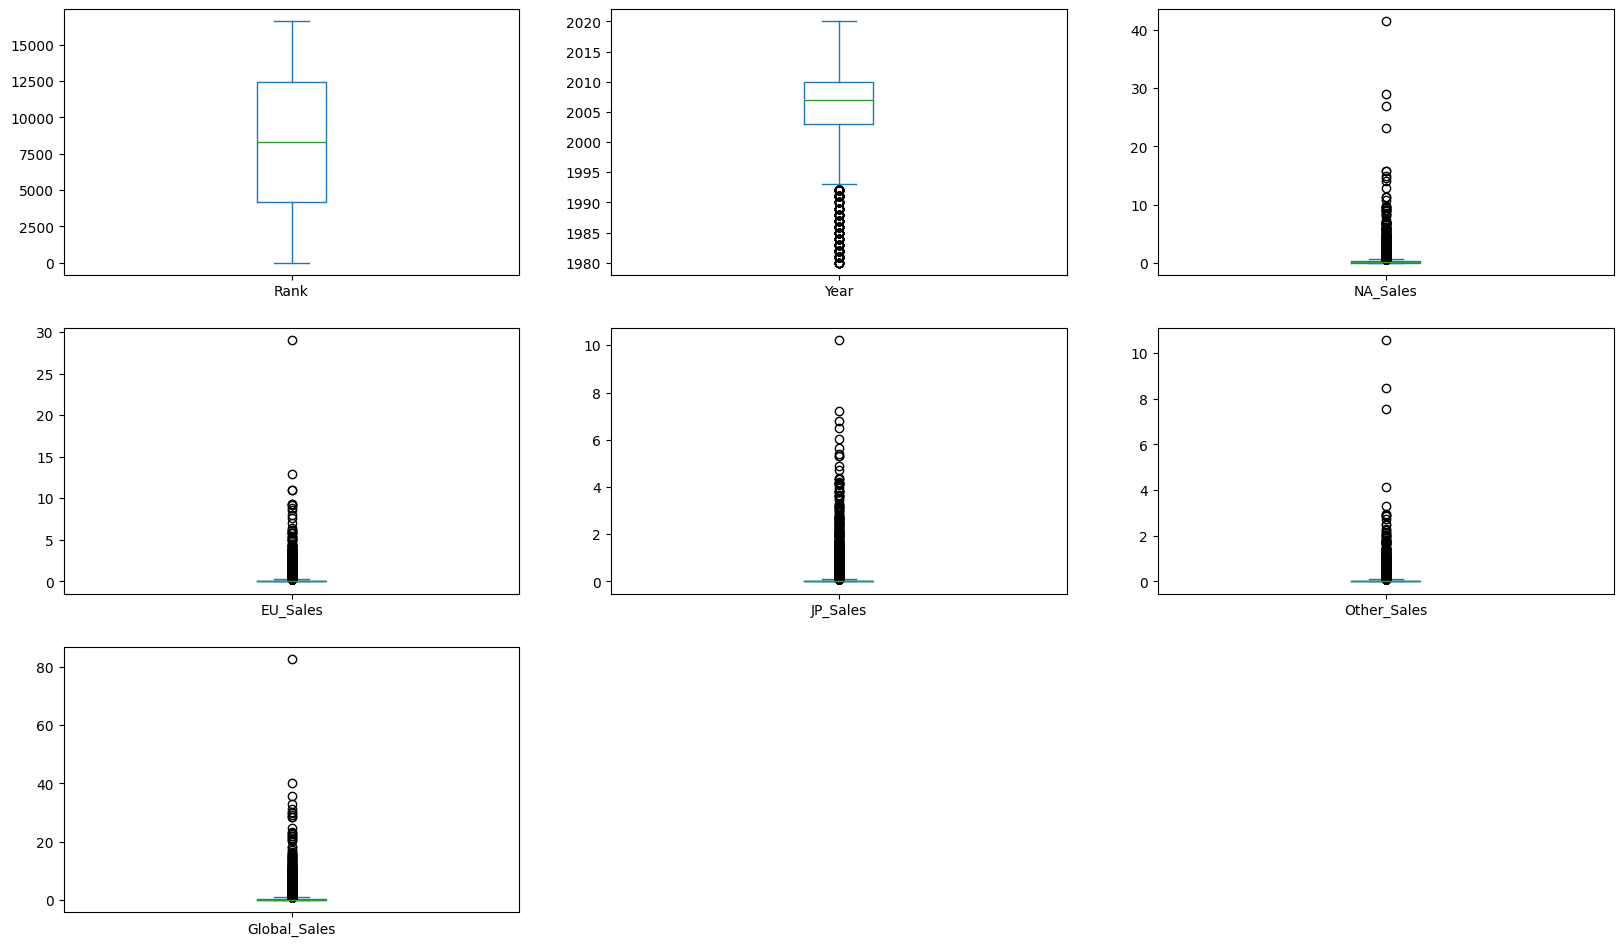

In [618]:
# there lots of outliers in Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(20,20))

In [619]:
df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

In [620]:
df['Name'].value_counts()

,count
Name,
Need for Speed: Most Wanted,12
LEGO Marvel Super Heroes,9
Ratatouille,9
Madden NFL 07,9
FIFA 14,9
...,...
Afrika,1
Blue Dragon Plus,1
Ninja Gaiden: Dragon Sword,1


In [621]:
df['Platform'].value_counts()

,count
Platform,
DS,2163
PS2,2161
PS3,1329
Wii,1325
X360,1265
PSP,1213
PS,1196
PC,960
XB,824


In [622]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [623]:
df['Genre'].value_counts()

,count
Genre,
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


In [624]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [625]:
df['Publisher'].value_counts()

,count
Publisher,
Electronic Arts,1409
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
...,...
Media Entertainment,1
New World Computing,1
Genterprise,1


In [626]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# 5) Outlier detection

In [628]:
# df1=df.copy()
# from scipy import stats
# for i in df1.columns:
#   if i !='Global_Sales':
#     z_score =np.abs(stats.zscore(df1[i]))
#     outliers=df1[z_score>3]
#     print(f'Number of outliers in {i} : {outliers.shape[0]}')


# # Outliers are identified and handled to improve the accuracy and reliability of the model

In [629]:
# for i in df1.columns:
#   if i !='Global_Sales':
#       data=df1[i]
#       Q1=data.quantile(0.25)
#       Q3=data.quantile(0.75)
#       IQR=Q3-Q1
#       lower_bound=Q1-1.5*IQR
#       upper_bound=Q3+1.5*IQR
#       df1=df1[(data>=lower_bound)&(data<=upper_bound)]

# for i in df1.columns:
#   if i !='Global_Sales':
#     z_score =np.abs(stats.zscore(df1[i]))
#     outliers=df1[z_score>3]
#     print(f'Number of outliers in {i} : {outliers.shape[0]}')

# df1.copy()

# df.info()

# df

In [630]:
# Z-score to detect outliers
from scipy import stats
numeric_columns=df.select_dtypes(include='number').columns
for i in numeric_columns:
    z_scores=np.abs(stats.zscore(df[i]))
    outliers=df[z_scores>3]
    print(f"Number of outliers in {i}: {len(outliers)}")

Number of outliers in Rank: 0
Number of outliers in Year: 205
Number of outliers in NA_Sales: 174
Number of outliers in EU_Sales: 214
Number of outliers in JP_Sales: 238
Number of outliers in Other_Sales: 177
Number of outliers in Global_Sales: 181


In [631]:
# # remove outliers
# c=['Year','NA_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']

# for i in c:
#     Q1 = df[i].quantile(0.25)
#     Q3 = df[i].quantile(0.75)
#     IQR = Q3 - Q1
#     df = df[~((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR)))]

In [632]:
 # Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df['Platform']=le.fit_transform(df['Platform'])
df['Genre']=le.fit_transform(df['Genre'])
df['Publisher']=le.fit_transform(df['Publisher'])

In [633]:
# # reducing all features range except target using log1p to reduce skewness
# c=['Year','Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
# for i in c:
#     df[i]=np.log1p(df[i])

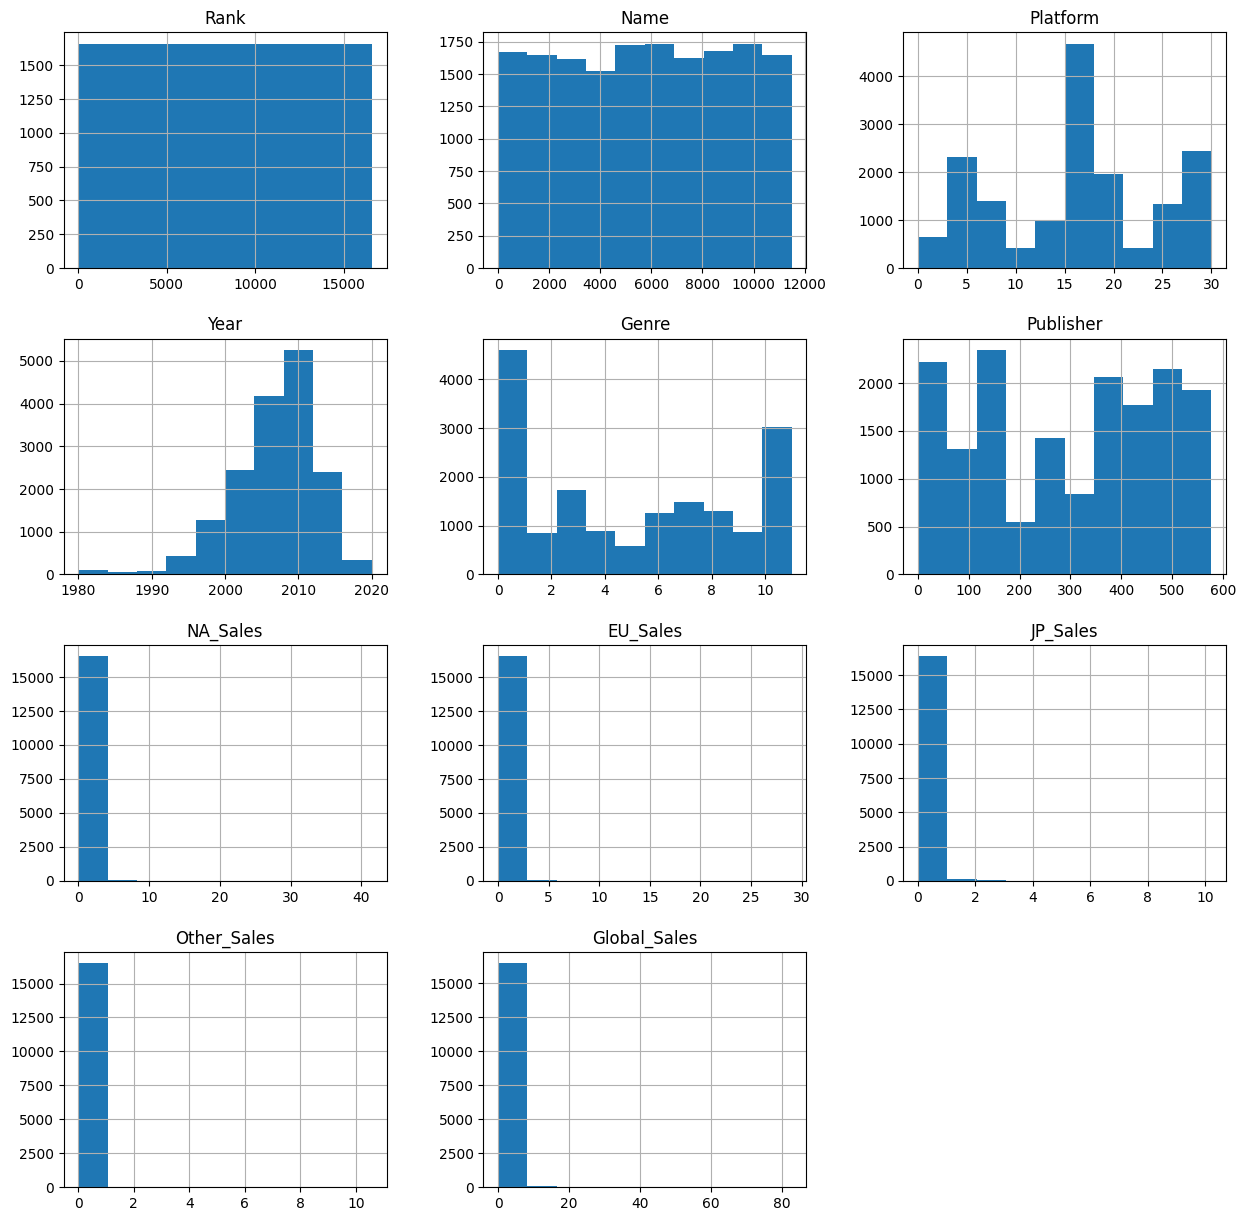

In [634]:
# visualization skewness
df.hist(figsize=(15,15))
plt.show()

# 6) Correlation

In [635]:
c=df.corr()
c

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.014656,-0.083953,0.177526,-0.053018,-0.020102,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Name,-0.014656,1.000000,0.014418,-0.001251,-0.004989,0.026968,0.012277,0.006542,0.015945,-0.006785,0.010888
Platform,-0.083953,0.014418,1.000000,0.166057,0.029061,-0.012544,0.041536,0.047158,-0.078207,0.055061,0.028213
Year,0.177526,-0.001251,0.166057,1.000000,-0.123861,0.029928,-0.091282,0.005824,-0.169432,0.040857,-0.074807
Genre,-0.053018,-0.004989,0.029061,-0.123861,1.000000,-0.050322,0.017435,0.016481,0.030085,0.009731,0.021671
Publisher,-0.020102,0.026968,-0.012544,0.029928,-0.050322,1.000000,0.003377,0.011835,0.051668,0.013616,0.017479
NA_Sales,-0.401362,0.012277,0.041536,-0.091282,0.017435,0.003377,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006542,0.047158,0.005824,0.016481,0.011835,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,0.015945,-0.078207,-0.169432,0.030085,0.051668,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,-0.006785,0.055061,0.040857,0.009731,0.013616,0.634737,0.726385,0.290186,1.000000,0.748331


<Axes: >

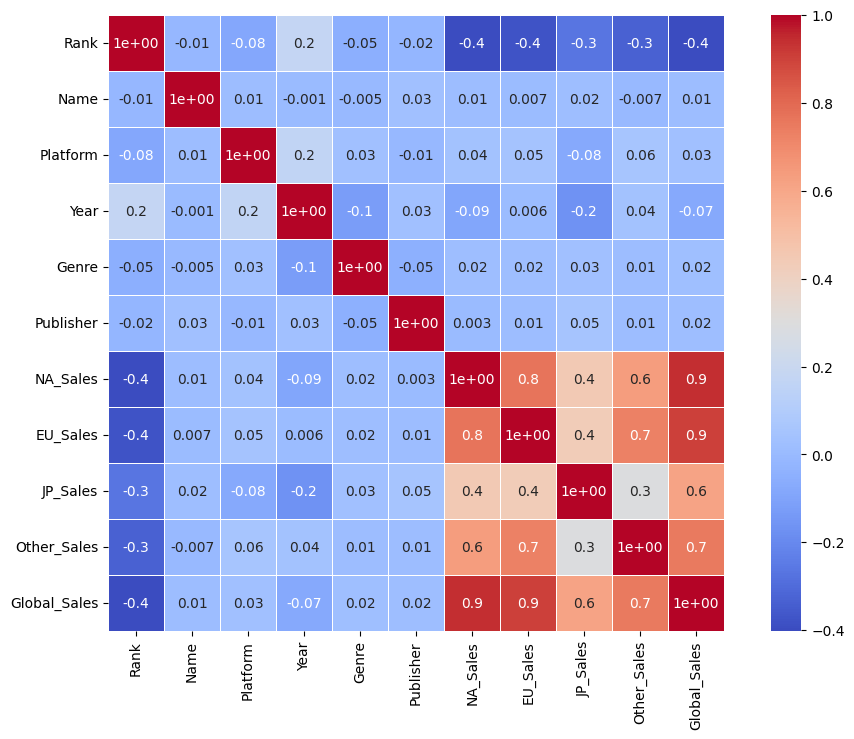

In [636]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(c,annot=True,cmap='coolwarm',robust=True,fmt='0.01',linewidths=0.5,square=True)

# 7) Dimensionality reduction

In [637]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # # Standardize the features before PCA
# c=['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
# X=StandardScaler().fit_transform(df[c])


# # Apply PCA
# pca=PCA(n_components=2)
# pca_r=pca.fit_transform(X)

# # Add PCA results to the DataFrame
# df['pca1']=pca_r[:,0]
# df['pca2']=pca_r[:,1]


# # Visualize PCA results
# sns.scatterplot(x='pca1',y='pca2',hue='Global_Sales',data=df)
# plt.title('PCA of video game Data')
# plt.show()


# 8) Data scailing

In [638]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
##Standardization (mean = 0, std = 1)
# scaler=StandardScaler()
# df[['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales' ]]=scaler.fit_transform(df[['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']])

##Normalization (scaling to 0-1 range)
minmax_scaler=MinMaxScaler()
df[['Rank','Name','Platform','NA_Sales','EU_Sales','Other_Sales']]=minmax_scaler.fit_transform(df[['Rank','Name','Platform','NA_Sales','EU_Sales','Other_Sales']])


# 9) Initial modeling and hypothesis testing

In [639]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import pandas as pd

# Prepare features and target
x = df[['Rank', 'Name', 'Platform', 'NA_Sales', 'EU_Sales', 'Other_Sales']]
y = df['Global_Sales']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("r2score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)



r2score: 0.8497971171311125
Mean Squared Error: 0.6310569812439762
Root Mean Squared Error: 0.7943909498754227


In [640]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define models in a dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# Dictionary to store results
results = {}

# Train and evaluate models using a loop
for name, model in models.items():
    print(f"Training {name}")

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {"MSE": mse, "RMSE": rmse, "R² Score": r2}

    # Print results
    print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}\n")


Training Linear Regression
Linear Regression - MSE: 0.0817, RMSE: 0.2859, R² Score: 0.9806

Training Decision Tree
Decision Tree - MSE: 0.6671, RMSE: 0.8167, R² Score: 0.8412

Training Random Forest
Random Forest - MSE: 0.6311, RMSE: 0.7944, R² Score: 0.8498



# 10) Documentation and Reporting

In [641]:
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation of': df.corr()['Global_Sales'].sort_values(ascending=False)
}

print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")

# Prepare final dataset for modeling
final_df = df

EDA Summary:
Dataset Shape: (16598, 11)
Missing Values: 0
Correlation of: Global_Sales    1.000000
NA_Sales        0.941047
EU_Sales        0.902836
Other_Sales     0.748331
JP_Sales        0.611816
Platform        0.028213
Genre           0.021671
Publisher       0.017479
Name            0.010888
Year           -0.074807
Rank           -0.427407
Name: Global_Sales, dtype: float64


# Summary

The document presents an analysis of a dataset detailing video game sales, exploring key factors influencing global sales figures. This includes data preprocessing steps such as handling missing values, detecting outliers, and performing dimensionality reduction through PCA. Finally, a decision tree regression model is applied to predict global sales, achieving a remarkably high R^2 score, indicating the model's effectiveness in forecasting sales based on the dataset's attributes.

* The dataset contains video game sales information for games that have sold over 100,000 copies, including details such as title, platform, genre, and sales figures across multiple regions.

* The target variable for analysis is the total global sales of video games, extracted from various regional sales data.

* Data cleaning processes were implemented to address missing values and duplicates, leading to a finalized dataset with a shape of (9081, 13) and no missing information.

* Descriptive statistics and visualizations were conducted to understand sales distribution and detect outliers, notably in areas such as NA_Sales and EU_Sales.

* Correlation analysis indicated a strong positive relationship between global sales and sales figures in North America, while there was a notable negative correlation with the year of release and rank.

* Feature engineering techniques included transforming categorical data into numerical format and minimizing skewness in features through logarithmic transformation.

* A Random Forest model was utilized for predicting global sales, yielding a high R^2 score of approximately 0.8497, showing excellent performance in sales forecasting.
